In [1]:
#install kaggle
!pip install -q kaggle

In [2]:
import sys
import os
from math import log
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahaseeb","key":"476132a78daf817fd115ece6c6b9febc"}'}

In [4]:
#create a kaggle folder
! mkdir ~/.kaggle

In [5]:
#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [6]:
#permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d keerthicheepurupalli/malimg-dataset9010

 99% 1.19G/1.21G [00:09<00:00, 133MB/s]
100% 1.21G/1.21G [00:09<00:00, 138MB/s]


In [8]:
!unzip malimg-dataset9010.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset_9010/dataset_9010/malimg_dataset/train/Dontovo.A/0359f055545c068bf2bbfc686a87fca8.png  
  inflating: dataset_9010/dataset_9010/malimg_dataset/train/Dontovo.A/038096c3e054504ee06d15b2c9a3bc46.png  
  inflating: dataset_9010/dataset_9010/malimg_dataset/train/Dontovo.A/0383c95ca595cdda9e479cadbac72256.png  
  inflating: dataset_9010/dataset_9010/malimg_dataset/train/Dontovo.A/038d5ee2e815bc21d6b2abaf6efc8697.png  
  inflating: dataset_9010/dataset_9010/malimg_dataset/train/Dontovo.A/03a6be98f16f88cc9796017e8447fa93.png  
  inflating: dataset_9010/dataset_9010/malimg_dataset/train/Dontovo.A/03cb3315b58fb0a816ea4128d04f9666.png  
  inflating: dataset_9010/dataset_9010/malimg_dataset/train/Dontovo.A/03cdff68f939b90b2c32c7a5db664240.png  
  inflating: dataset_9010/dataset_9010/malimg_dataset/train/Dontovo.A/03e52e6dfa8ef26105a624a318dcd8ac.png  
  inflating: dataset_9010/dataset_9010/malimg_dataset/train/Dontovo.A/03fb98d

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

#Generating DataSet
path_root = "/content/dataset_9010/dataset_9010/malimg_dataset/train"
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(64,64), batch_size=10000)

Found 8404 images belonging to 25 classes.


In [ ]:
batches.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [ ]:
imgs, labels = next(batches)

In [ ]:
imgs.shape

(8404, 64, 64, 3)

In [ ]:
labels.shape

(8404, 25)

In [ ]:
# plotting images with labels
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(batches.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

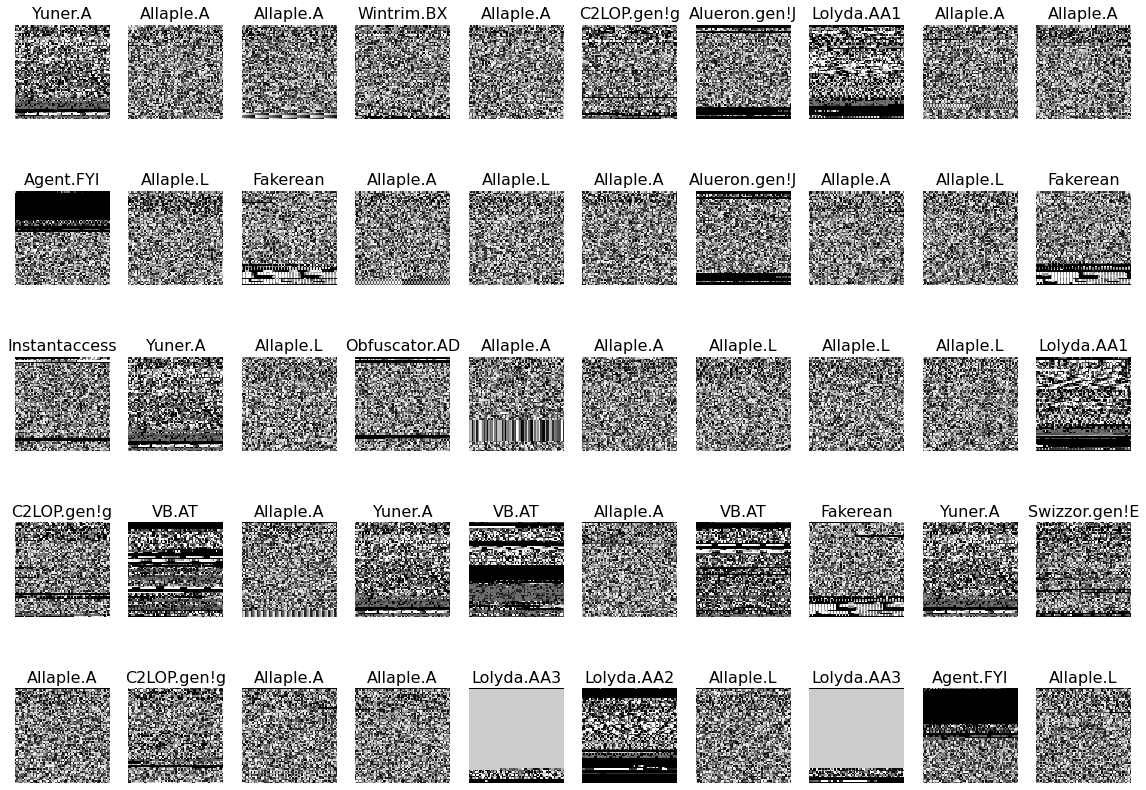

In [ ]:
plots(imgs, titles = labels)

In [ ]:
classes = batches.class_indices.keys()

In [ ]:
perc = (sum(labels)/labels.shape[0])*100

<BarContainer object of 25 artists>

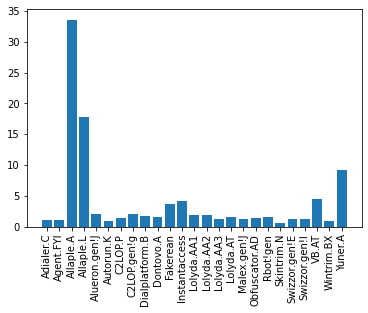

In [ ]:
plt.xticks(rotation='vertical')
plt.bar(classes,perc)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

In [ ]:
X_train.shape

(5882, 64, 64, 3)

In [ ]:
X_test.shape

(2522, 64, 64, 3)

In [ ]:
y_train.shape

(5882, 25)

In [ ]:
y_test.shape

(2522, 25)

In [ ]:
#cnn model
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [ ]:
num_classes = 25

In [ ]:
def malware_model():
    Malware_model = Sequential()
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(64,64,3)))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='relu'))
    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50, activation='relu'))
    Malware_model.add(Dense(num_classes, activation='softmax'))
    Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return Malware_model

In [ ]:
Malware_model = malware_model()

In [ ]:
Malware_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 30)        840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 15)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 15)        0         
                                                                 
 flatten (Flatten)           (None, 2940)              0

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train_new = np.argmax(y_train, axis=1)

In [ ]:
y_train_new

array([24, 21,  2, ..., 22,  2,  2])

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                 classes = np.unique(y_train_new),
                                                 y = y_train_new)
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

{0: 3.6196923076923078,
 1: 3.6196923076923078,
 2: 0.11955284552845528,
 3: 0.22732367149758453,
 4: 2.08212389380531,
 5: 4.7056,
 6: 2.735813953488372,
 7: 1.7960305343511451,
 8: 2.158532110091743,
 9: 2.4766315789473685,
 10: 1.0598198198198199,
 11: 0.8946007604562738,
 12: 2.284271844660194,
 13: 2.240761904761905,
 14: 3.46,
 15: 2.4255670103092783,
 16: 2.9782278481012656,
 17: 2.941,
 18: 2.5029787234042553,
 19: 5.882,
 20: 3.46,
 21: 3.0164102564102566,
 22: 0.8586861313868613,
 23: 5.005957446808511,
 24: 0.43012797074954295}

In [ ]:
Malware_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20,  class_weight=class_weight_dict)

Epoch 1/20
184/184 [==============================] - 24s 128ms/step - loss: 2.4571 - accuracy: 0.2112 - val_loss: 1.7498 - val_accuracy: 0.3937
Epoch 2/20
184/184 [==============================] - 23s 125ms/step - loss: 1.1197 - accuracy: 0.4517 - val_loss: 1.3279 - val_accuracy: 0.4377
Epoch 3/20
184/184 [==============================] - 23s 125ms/step - loss: 0.8289 - accuracy: 0.5262 - val_loss: 1.2060 - val_accuracy: 0.5369
Epoch 4/20
184/184 [==============================] - 23s 126ms/step - loss: 0.6575 - accuracy: 0.5855 - val_loss: 0.6933 - val_accuracy: 0.7577
Epoch 5/20
184/184 [==============================] - 23s 124ms/step - loss: 0.5738 - accuracy: 0.6110 - val_loss: 0.6384 - val_accuracy: 0.7585
Epoch 6/20
184/184 [==============================] - 23s 126ms/step - loss: 0.4799 - accuracy: 0.6663 - val_loss: 0.5569 - val_accuracy: 0.7375
Epoch 7/20
184/184 [==============================] - 23s 126ms/step - loss: 0.4268 - accuracy: 0.7251 - val_loss: 0.5014 - val_ac

In [ ]:
scores = Malware_model.evaluate(X_test, y_test)

79/79 [==============================] - 3s 34ms/step - loss: 0.2054 - accuracy: 0.8715


In [ ]:
print('Final CNN accuracy: ', scores[1])

Final CNN accuracy:  0.8915305328369141


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
y_pred = np.argmax(Malware_model.predict(X_test), axis=-1)
y_pred

array([ 5,  2,  2, ..., 13,  3,  6])

In [ ]:
y_test2 = np.argmax(y_test, axis=1)
y_test2

array([24,  2,  2, ..., 13,  3,  6])

In [ ]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test2, y_pred)

In [ ]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
   
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

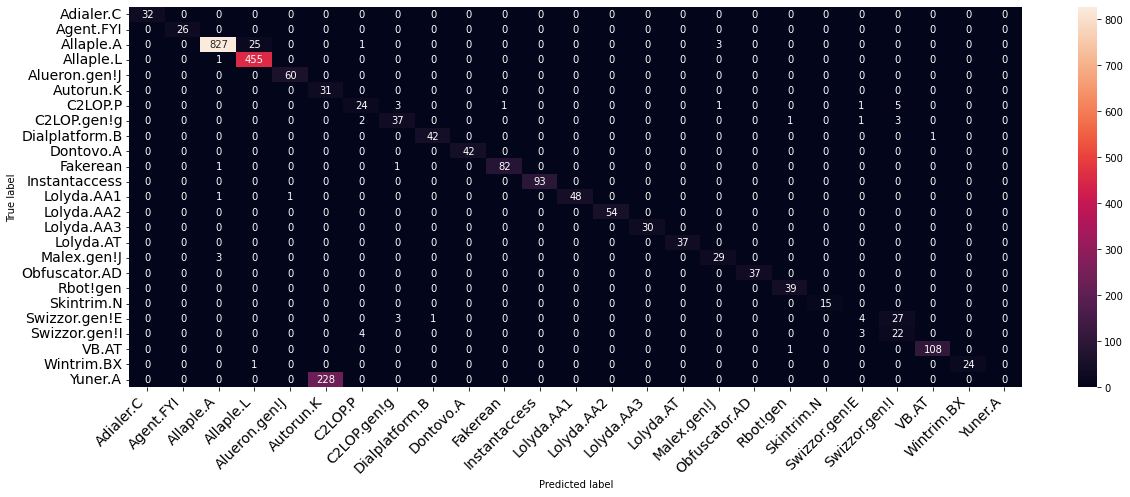

In [ ]:
class_names= batches.class_indices.keys()
import pandas as pd

confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=14)